In [18]:
import numpy as np
import sys
sys.path.insert(1,r"C:\Users\nelg\Desktop\Cours\Labo\TP4\Git\tracking")
from track import Track
from other_hough_transform import new_method_tracks,old_method_tracks, old_method_tracks_no_geom
from artificial_tracks import create_artificial_tracks_geom, create_artificial_tracks_no_geom, create_artificial_tracks
from parameters import *
import matplotlib.pyplot as plt
import matplotlib as mpl
from track_reconstruction import plot_hits

fs = 16
params = {"text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)
plt.rc('font', size=fs)          # controls default text sizes
plt.rc('axes', titlesize=fs)     # fontsize of the axes title
plt.rc('axes', labelsize=fs)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=fs)    # fontsize of the tick labels
plt.rc('ytick', labelsize=fs)    # fontsize of the tick labels
plt.rc('legend', fontsize=fs-2)    # legend fontsize


t = np.linspace(-5,5,100)
x0 = width*n_strips/2 - t*n_layers*(thickness+thickness_screen)
angle = np.arctan(t)


In [12]:
# Before, the offset was measured at the top of the detector, now it is measured at the bottom.
# Also, the origin was defined at x=1.6cm instead of 0cm.
# -> x0 has to be converted
def parameters_conversion(x0_old, t_old):
    return x0_old-t_old*total_height-width, t_old

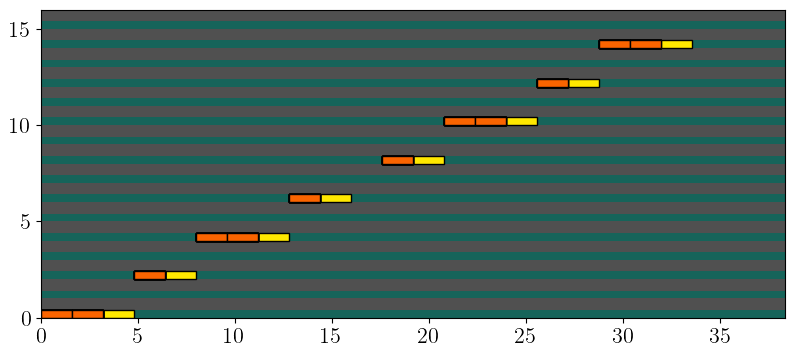

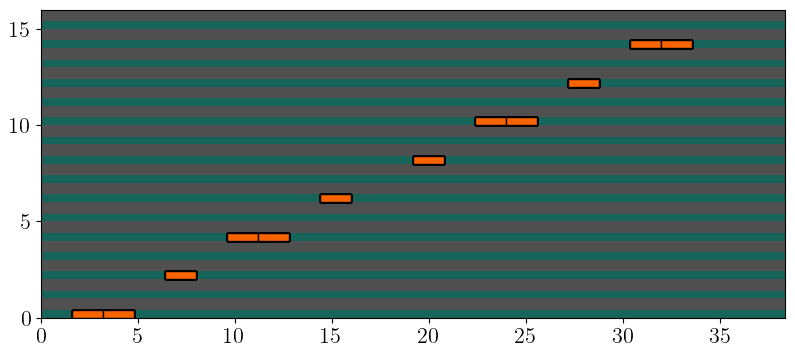

In [13]:
# Comparison with and without geometry

t_geom = []
x0_geom = []
t_no_geom = []
x0_no_geom = []
# number of mistake (additional of missing hit) made by the algorithm
wrong_hits_geom = []
wrong_hits_no_geom = []

for i,ti in enumerate(t):
    hits = create_artificial_tracks_geom(ti,x0[i],True)
    coords = []
    for hit in hits:
        coords.append(hit.coord)
    
    # reconstructed parameters

    xi0_1, ti_1, _ = old_method_tracks(hits)
    xi0_2, ti_2, _ = old_method_tracks_no_geom(coords)
    xi0_2, ti_2 = parameters_conversion(xi0_2, ti_2)
    t_geom.append(ti_1)
    t_no_geom.append(ti_2)
    x0_geom.append(xi0_1)
    x0_no_geom.append(xi0_2)

    # hits on the reconstructed trajectory
    hits_reconstructed_1 = create_artificial_tracks_geom(ti_1, xi0_1, True)
    hits_reconstructed_2 = create_artificial_tracks_geom(ti_2, xi0_2, True)
    
    coords_1 = []
    for hit in hits_reconstructed_1:
        coords_1.append(hit.coord)

    coords_2 = []
    for hit in hits_reconstructed_2:
        coords_2.append(hit.coord)

    wrong_hits_geom_i = 0
    wrong_hits_no_geom_i = 0.

    # Count of the missing hits
    for coord in coords:
        if coords_1.count(coord) == 0:
            wrong_hits_geom_i += 1
        if coords_2.count(coord) == 0:
            wrong_hits_no_geom_i += 1

    # Count of the excess hits
    for coord in coords_1:
        if coords.count(coord) == 0:
            wrong_hits_geom_i += 1
    for coord in coords_2:
        if coords.count(coord) == 0:
            wrong_hits_no_geom_i += 1
    
    if i == 70:
        fig,ax = plot_hits(hits,hits_next=hits_reconstructed_2,x_plane=True,scaling=0.5)
        fig,ax = plot_hits(hits,hits_next=hits_reconstructed_1,x_plane=True,scaling=0.5)
    
    wrong_hits_geom.append(wrong_hits_geom_i)
    wrong_hits_no_geom.append(wrong_hits_no_geom_i)

    

t_geom = np.array(t_geom)
x0_geom = np.array(x0_geom)
t_no_geom = np.array(t_no_geom)
x0_no_geom = np.array(x0_no_geom)

err_t_geom = t_geom-t
err_t_no_geom = t_no_geom-t
err_x0_geom = x0_geom-x0
err_x0_no_geom = x0_no_geom-x0

angle_geom = np.arctan(t_geom)
angle_no_geom = np.arctan(t_no_geom)
err_angle_geom = angle_geom-angle
err_angle_no_geom = angle_no_geom-angle


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


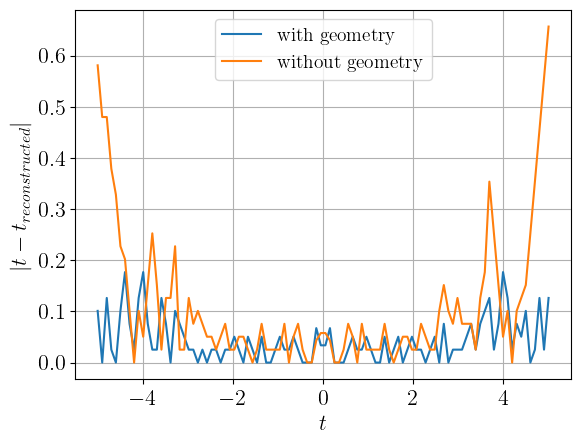

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


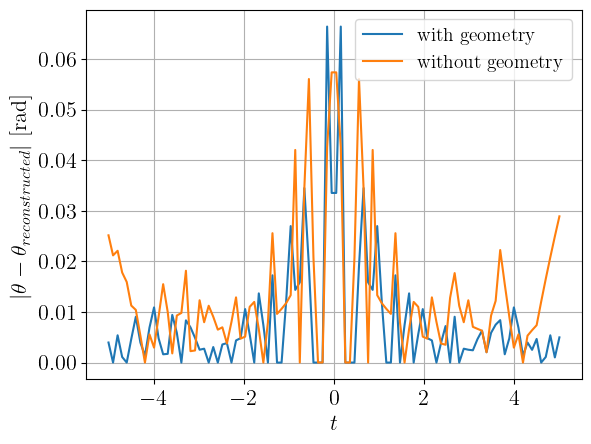

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


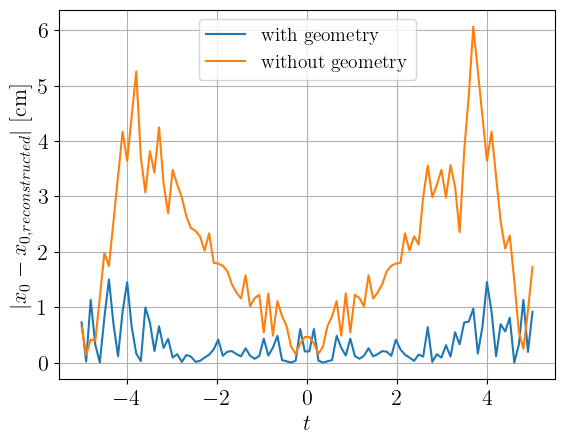

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


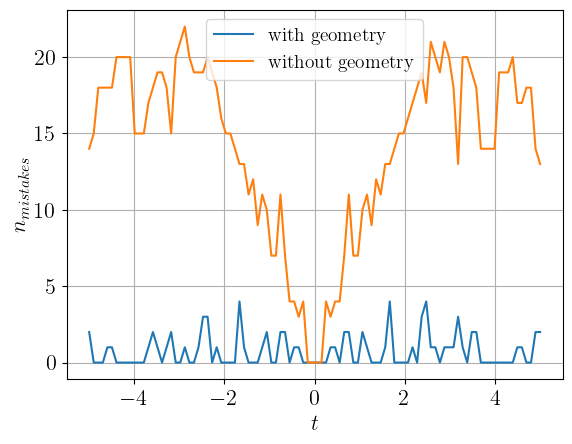

In [22]:
# Plot of bias with and without geometry
skip = 1
plt.plot(t[::skip],abs(err_t_geom[::skip]),label="with geometry")
plt.plot(t[::skip],abs(err_t_no_geom[::skip]),label="without geometry")
plt.legend()
plt.grid()
plt.ylabel("$|t-t_{reconstructed}|$")
plt.xlabel("$t$")
plt.savefig("err_t_geom.eps", bbox_inches = 'tight')
plt.show()

plt.plot(t[::skip],abs(err_angle_geom[::skip]),label="with geometry")
plt.plot(t[::skip],abs(err_angle_no_geom[::skip]),label="without geometry")
plt.legend()
plt.grid()
plt.ylabel(r"$|\theta-\theta_{reconstructed}|\ [\mathrm{rad}]$")
plt.xlabel("$t$")
plt.savefig("err_angle_geom.eps", bbox_inches = 'tight')
plt.show()

plt.plot(t[::skip],abs(err_x0_geom[::skip]),label="with geometry")
plt.plot(t[::skip],abs(err_x0_no_geom[::skip]),label="without geometry")
plt.legend()
plt.grid()
plt.ylabel("$|x_0-x_{0,reconstructed}|\ [\mathrm{cm}]$")
plt.xlabel("$t$")
plt.savefig("err_x0_geom.eps", bbox_inches = 'tight')
plt.show()

plt.plot(t[::skip], wrong_hits_geom[::skip], label="with geometry")
plt.plot(t[::skip], wrong_hits_no_geom[::skip], label="without geometry")
plt.legend()
plt.grid()
plt.ylabel("$n_{mistakes}$")
plt.xlabel("$t$")
plt.savefig("n_mistakes_geom.eps", bbox_inches = 'tight')
plt.show()

-1.9696969696969697 34.95757575757576


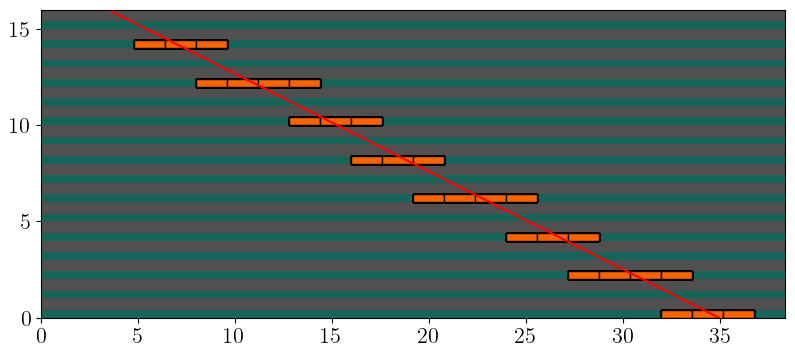

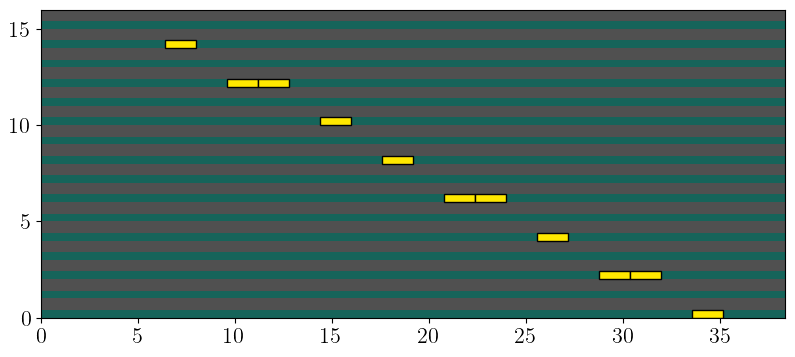

In [5]:
# Illustration of the number of mistakes
n = 30
hits = create_artificial_tracks_geom(t[n],x0[n],True)
coords = []
for hit in hits:
    coords.append(hit.coord)

x0_rec, t_rec, _ = old_method_tracks_no_geom(coords)
# x0_rec, t_rec = parameters_conversion(x0_rec, t_rec)
hits_rec = create_artificial_tracks_no_geom(t_rec,x0_rec,True)

z = np.linspace(0,16,10)
x = x0[n]+t[n]*z

fig_1,ax_1 = plot_hits(hits,True,scaling=0.5,hits_next=hits_rec)
fig,ax = plot_hits(hits,True,scaling=0.5)
ax_1.plot(x,z,'r-')

print(t[n],x0[n])


In [8]:

# z = np.linspace(0,2*n_layers*(thickness+thickness_screen),10)

t_1 = []
x0_1 = []
t_2 = []
x0_2 = []
t_3 = []
x0_3 = []

index_bias = 99

for i,ti in enumerate(t):
    hits = create_artificial_tracks(ti,x0[i],True)
    if i == index_bias:
        hits_bias = hits
    track = Track(hits)
    ti_1 = track.t
    xi0_1 = track.x0
    ti_2, xi0_2 = new_method_tracks(hits)
    xi0_3, ti_3, _ = old_method_tracks(hits)
    t_1.append(ti_1)
    t_2.append(ti_2)
    t_3.append(ti_3)
    x0_1.append(xi0_1)
    x0_2.append(xi0_2)
    x0_3.append(xi0_3)

t_1 = np.array(t_1)
x0_1 = np.array(x0_1)
t_2 = np.array(t_2)
x0_2 = np.array(x0_2)
t_3 = np.array(t_3)
x0_3 = np.array(x0_3)

err_t_1 = np.array(t-t_1)
err_x0_1 = np.array(x0-x0_1)
err_t_2 = np.array(t-t_2)
err_x0_2 = np.array(x0-x0_2)
err_t_3 = np.array(t-t_3)
err_x0_3 = np.array(x0-x0_3)

IndexError: list index out of range

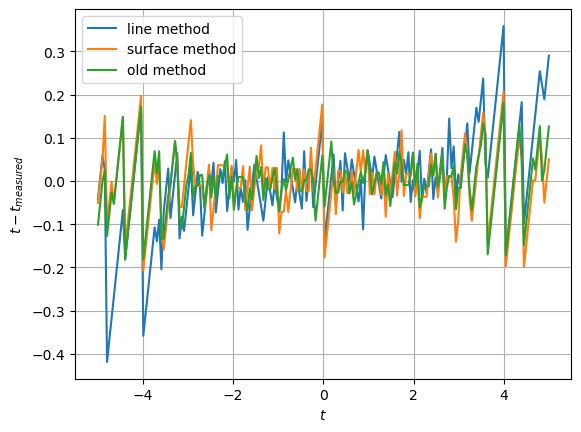

In [2]:
plt.plot(t,err_t_1,label="line method")
plt.plot(t,err_t_2,label="surface method")
plt.plot(t,err_t_3,label="old method")
plt.legend()
plt.grid()
plt.ylabel("$t-t_{measured}$")
plt.xlabel("$t$")
plt.show()

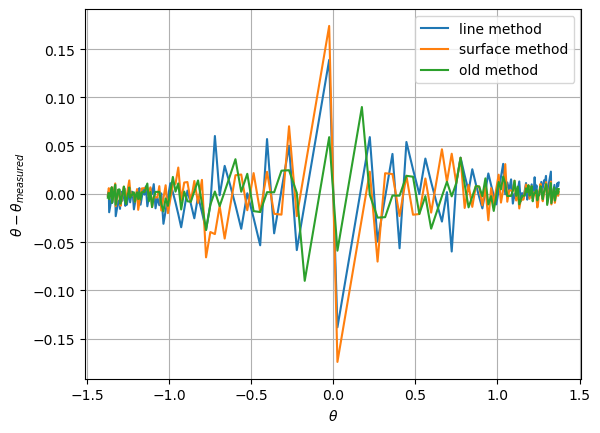

In [3]:
## Error on angle 
angle = np.arctan(t)
angle_1 = np.arctan(t_1)
angle_2 = np.arctan(t_2)
angle_3 = np.arctan(t_3)

err_angle_1 = angle-angle_1
err_angle_2 = angle-angle_2
err_angle_3 = angle-angle_3

plt.plot(angle,err_angle_1,label="line method")
plt.plot(angle,err_angle_2,label="surface method")
plt.plot(angle,err_angle_3,label="old method")
plt.legend()
plt.grid()
plt.ylabel(r"$\theta-\theta_{measured}$")
plt.xlabel(r"$\theta$")
plt.show()


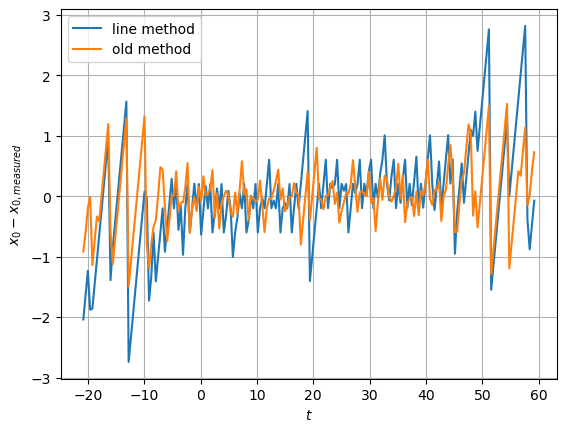

In [3]:
plt.plot(x0,err_x0_1,label="line method")
# plt.plot(x0,err_x0_2,label="surface method")
plt.plot(x0,err_x0_3,label="old method")
plt.legend()
plt.grid()
plt.ylabel("$x_0-x_{0,measured}$")
plt.xlabel("$t$")
plt.show()

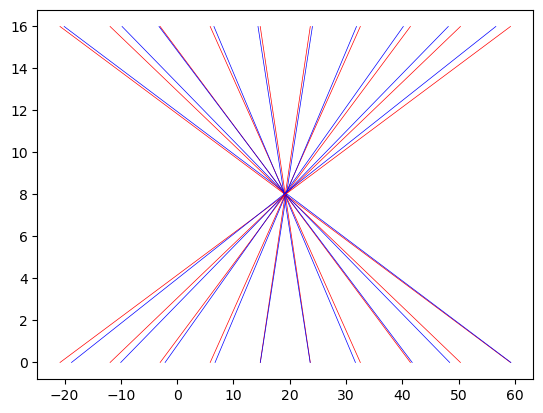

In [4]:
t = np.linspace(-5,5,10)
x0 = width*n_strips/2 - t*n_layers*(thickness+thickness_screen)

z = np.linspace(0,2*n_layers*(thickness+thickness_screen),10)

for i,ti in enumerate(t):
    hits = create_artificial_tracks_geom(ti,x0[i],True)
    track = Track(hits)
    t_1 = track.t
    x0_1 = track.x0
    plt.plot(x0[i]+ti*z,z,'r-',linewidth=0.5)
    plt.plot(x0_1+t_1*z,z,'b-',linewidth=0.5)
plt.savefig("test_offset.pdf")
plt.show()

C:\Users\nelg\AppData\Local\Temp\ipykernel_15840\3279820718.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


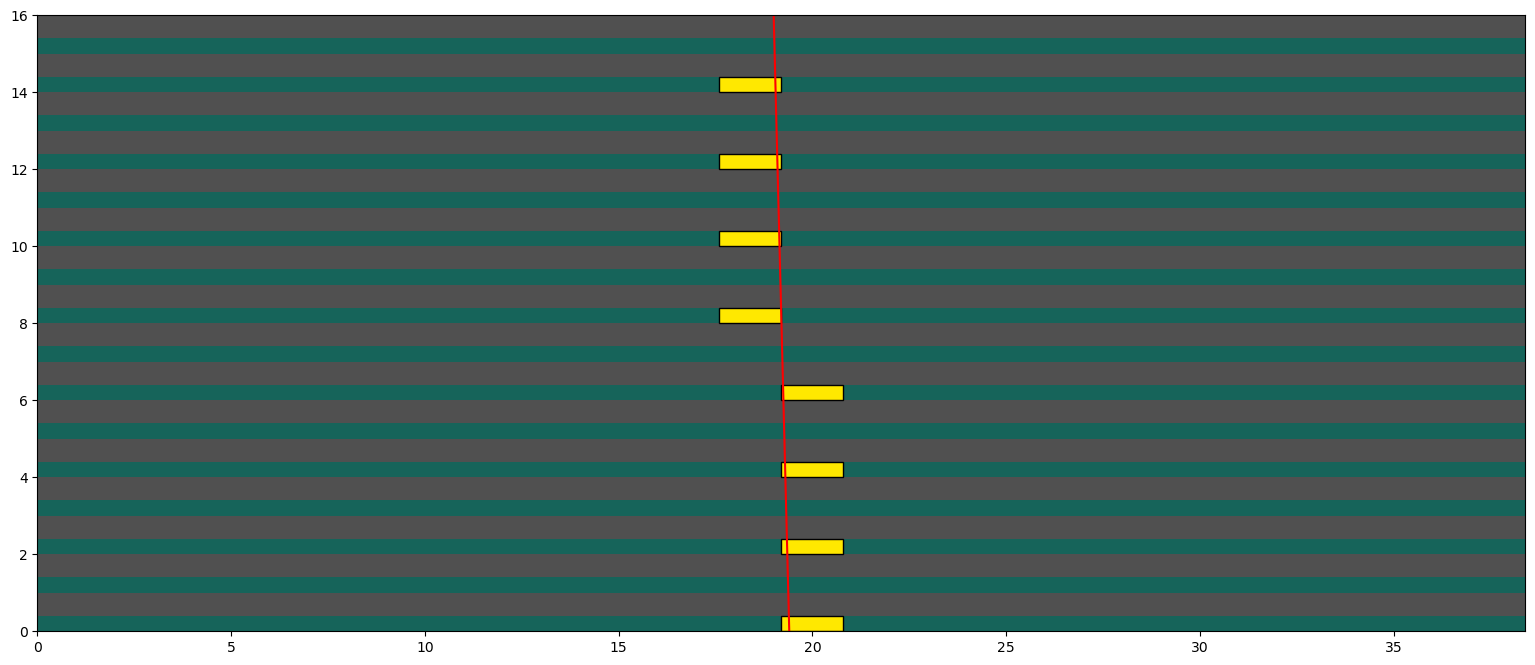

In [10]:
fig,ax = plot_hits(hits_bias)
z = np.linspace(0,16,50)
x = x0[index_bias]+t[index_bias]*z
ax.plot(x,z,'r-')
fig.show()

In [35]:
hits = []
for i in range(n_layers):
    hits.append([1,8-i])
x0_essai,t_essai,_ = old_method_tracks_no_geom(hits)
print(x0_essai,t_essai)

2.4000000000000004 2.0816681711721685e-17
